# Welcome to the Lab 🥼🧪
## How do I retrieve and download price feeds for historical backtesting?

In this notebook, we will retrieve all price feeds, back to 2011, for markets currently tradeable on the [Parcl Exchange](https://app.parcl.co/collection/active-markets)

**Note** This notebook will work with any of the dozens of daily price feeds available.

As a reminder, you can get your Parcl Labs API key [here](https://dashboard.parcllabs.com/signup) to follow along.

To run this immediately, you can use Google Colab. Remember, you must set your `PARCL_LABS_API_KEY` as a secret. See this [guide](https://medium.com/@parthdasawant/how-to-use-secrets-in-google-colab-450c38e3ec75) for more information.

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ParclLabs/parcllabs-examples/blob/main/python/introduction/price_feed.ipynb)

In [1]:
import os
import sys
import json
import subprocess
from datetime import datetime
from urllib.request import urlopen

# Collab setup from one click above
if "google.colab" in sys.modules:
    from google.colab import userdata
    %pip install parcllabs plotly kaleido
    api_key = userdata.get('PARCL_LABS_API_KEY')
else:
    api_key = os.getenv('PARCL_LABS_API_KEY')

In [2]:
import parcllabs
from parcllabs import ParclLabsClient

print(f"Parcl Labs Version: {parcllabs.__version__}")

Parcl Labs Version: 0.2.1


In [3]:
# Initialize the Parcl Labs client
client = ParclLabsClient(api_key)

In [4]:
# lets get all US markets currently available to trade on the Parcl Exchange
# Now lets say you want all price feed markets that are on the parcl exchange
market_df = client.search_markets.retrieve(
    sort_by='PARCL_EXCHANGE_MARKET',
    as_dataframe=True,
    params={'limit': 14},  # expand the default limit to 14, as of this writing, 14 markets are available
)

market_df

,parcl_id,country,geoid,state_fips_code,name,state_abbreviation,region,location_type,total_population,median_income,parcl_exchange_market,pricefeed_market,case_shiller_10_market,case_shiller_20_market
0,5384169,USA,1304000,13,Atlanta City,GA,SOUTH_ATLANTIC,CITY,494838,77655,1,1,0,0
1,5407714,USA,2507000,25,Boston City,MA,NEW_ENGLAND,CITY,665945,89212,1,1,0,0
2,5387853,USA,1714000,17,Chicago City,IL,EAST_NORTH_CENTRAL,CITY,2721914,71673,1,1,0,0
3,5380879,USA,4805000,48,Austin City,TX,WEST_SOUTH_CENTRAL,CITY,958202,86556,1,1,0,0
4,5353022,USA,1245025,12,Miami Beach City,FL,SOUTH_ATLANTIC,CITY,82400,65116,1,1,0,0
5,5377230,USA,3240000,32,Las Vegas City,NV,MOUNTAIN,CITY,644835,66356,1,1,0,0
6,5503877,USA,1150000,11,Washington City,DC,SOUTH_ATLANTIC,CITY,670587,101722,1,1,0,0
7,5822447,USA,36047,36,Kings County,NY,MIDDLE_ATLANTIC,COUNTY,2679620,74692,1,1,0,0
8,5372594,USA,3651000,36,New York City,NY,MIDDLE_ATLANTIC,CITY,8622467,76607,1,1,0,0
9,5373892,USA,0644000,06,Los Angeles City,CA,PACIFIC,CITY,3881041,76244,1,1,0,0


In [5]:
# lets store the parcl_ids of the markets we are interested in
parcl_ids = market_df['parcl_id'].tolist()

In [6]:
# lets retrieve data back to 2011 for these price feeds
START_DATE = '2011-01-01'

price_feeds = client.price_feed.retrieve_many(
    parcl_ids=parcl_ids,
    start_date=START_DATE,
    as_dataframe=True,
    params={'limit': 1000},  # expand the limit to 1000, these are daily series
    auto_paginate=True, # auto paginate to get all the data - WARNING: ~6k credits can be used in one parcl price feed. Change the START_DATE to a more recent date to reduce the number of credits used
)

price_feeds.head()

|████████████████████████████████████████| 14/14 [100%] in 14.1s (1.00/s) 


,date,price_feed,parcl_id
0,2024-05-14,298.51,5384169
1,2024-05-13,298.53,5384169
2,2024-05-12,298.41,5384169
3,2024-05-11,298.51,5384169
4,2024-05-10,298.90,5384169


<Axes: xlabel='date'>

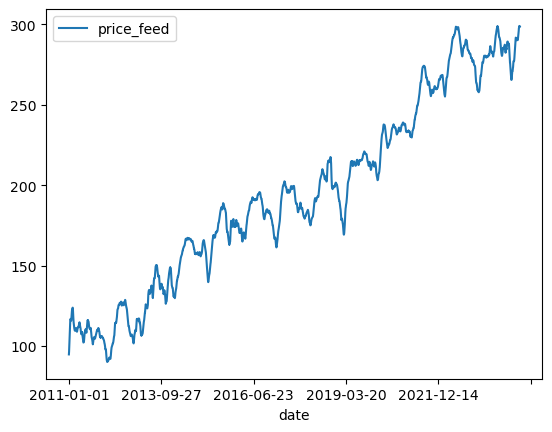

In [7]:
# 5384169 corresponds to Atlanta city
price_feeds.loc[price_feeds['parcl_id'] == 5384169].sort_values('date').plot(x='date', y='price_feed')

In [8]:
# lets get the volatility

volatility = client.price_feed_volatility.retrieve_many(
    parcl_ids=parcl_ids,
    start_date=START_DATE,
    as_dataframe=True,
    params={'limit': 1000},  # expand the limit to 1000, these are daily series
    auto_paginate=True, # auto paginate to get all the data - WARNING: ~6k credits can be used in one parcl price feed. Change the START_DATE to a more recent date to reduce the number of credits used
)

volatility.head()

|████████████████████████████████████████| 14/14 [100%] in 14.7s (0.95/s) 


,date,pct_volatility,parcl_id
0,2024-05-14,0.0226,5384169
1,2024-05-13,0.0227,5384169
2,2024-05-12,0.0240,5384169
3,2024-05-11,0.0249,5384169
4,2024-05-10,0.0251,5384169


<Axes: xlabel='date'>

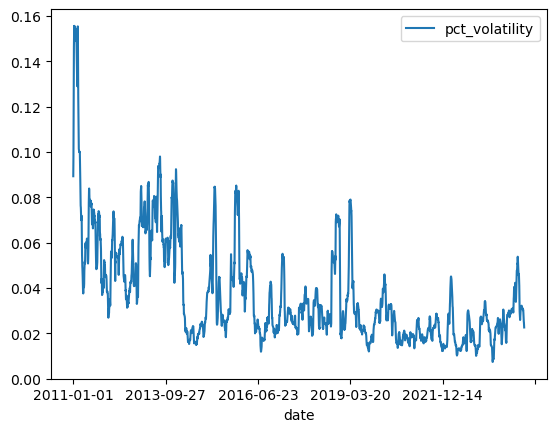

In [9]:
volatility.loc[volatility['parcl_id'] == 5384169].sort_values('date').plot(x='date', y='pct_volatility')

In [10]:
# lets create a clean output table to download volatility, price feeds, and market names and stats all together
# lets merge the dataframes
df = price_feeds.merge(volatility, on=['parcl_id', 'date'], how='inner')
df.head()

,date,price_feed,parcl_id,pct_volatility
0,2024-05-14,298.51,5384169,0.0226
1,2024-05-13,298.53,5384169,0.0227
2,2024-05-12,298.41,5384169,0.0240
3,2024-05-11,298.51,5384169,0.0249
4,2024-05-10,298.90,5384169,0.0251


In [12]:
# lets pull in name, location_type, total_population, and median_income
df = df.merge(market_df[['parcl_id', 'name', 'location_type', 'total_population', 'median_income']], on='parcl_id', how='inner')
df.head()

,date,price_feed,parcl_id,pct_volatility,name,location_type,total_population,median_income
0,2024-05-14,298.51,5384169,0.0226,Atlanta City,CITY,494838,77655
1,2024-05-13,298.53,5384169,0.0227,Atlanta City,CITY,494838,77655
2,2024-05-12,298.41,5384169,0.0240,Atlanta City,CITY,494838,77655
3,2024-05-11,298.51,5384169,0.0249,Atlanta City,CITY,494838,77655
4,2024-05-10,298.90,5384169,0.0251,Atlanta City,CITY,494838,77655


In [ ]:
# save to csv
df.to_csv('parcl_data.csv', index=False)